# Predicting HIV Testing Practices Among Reproductive-Age Women in Ethiopia Using Machine Learning: Insights from the 2019 DHS Data

In [1]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations in Python
import numpy as np  # Library for numerical computations and array manipulations
import pandas as pd  # Library for data manipulation and analysis
import seaborn as sns  # Library for statistical data visualization

import pyreadstat  # Library for reading and writing data files in various formats (e.g., SAS, Stata, SPSS)

from sklearn import model_selection  # Module for model selection utilities
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Class for Linear Discriminant Analysis
from sklearn.ensemble import RandomForestClassifier  # Class for the Random Forest classifier
from sklearn.feature_selection import SelectFromModel  # Class for feature selection based on a model
from sklearn.impute import KNNImputer  # Class for K-Nearest Neighbors imputation
from sklearn.linear_model import LogisticRegression  # Class for Logistic Regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score  # Metrics for evaluating models
from sklearn.model_selection import train_test_split  # Function for splitting data into training and testing sets
from sklearn.naive_bayes import GaussianNB  # Class for Gaussian Naive Bayes
from sklearn.neighbors import KNeighborsClassifier  # Class for K-Nearest Neighbors classifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder  # Classes for data preprocessing: encoding categorical features 
from sklearn.svm import SVC  # Class for Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Class for Decision Tree classifier
from lazypredict.Supervised import LazyClassifier
from catboost import CatBoostClassifier

# Import data from stata

In [2]:
hiv_data_row = pd.read_stata("women15_49.dta")

In [4]:
#Import label names from STATA
hiv, meta = pyreadstat.read_dta("women15_49.dta")
column_mapping = dict(zip(meta.column_names, meta.column_labels))
column_mapping

{'caseid': 'case identification',
 'v001': 'cluster number',
 'v002': 'household number',
 'v005': "women's individual sample weight (6 decimals)",
 'v012': "respondent's current age",
 'v013': 'age in 5-year groups',
 'v021': 'primary sampling unit',
 'v024': 'region',
 'v025': 'type of place of residence',
 'v026': 'de facto place of residence',
 'v102': 'type of place of residence',
 'v103': 'childhood place of residence',
 'v104': 'years lived in place of residence',
 'v105': 'type of place of previous residence',
 'v105a': 'region of previous residence',
 'v106': 'highest educational level',
 'v107': 'highest year of education',
 'v120': 'household has: radio',
 'v121': 'household has: television',
 'v130': 'religion',
 'v131': 'ethnicity',
 'v151': 'sex of household head',
 'v152': 'age of household head',
 'v153': 'household has: telephone (land-line)',
 'v155': 'literacy',
 'v156': 'ever participated in a literacy program outside of primary',
 'v157': 'frequency of reading news

# Explore data

In [5]:
hiv_data_row.shape

(15683, 106)

In [5]:
hiv_data_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15683 entries, 0 to 15682
Columns: 106 entries, caseid to s1056
dtypes: category(100), int16(3), int32(1), int8(1), object(1)
memory usage: 1.8+ MB


## Remove unnecessary columns

### Remove columns that have all missing value or have no obseravtions 

In [6]:
# get the number of missing data points per column
missing_values_new_count = hiv_data_row.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_new_count[0:106]

caseid       0
v001         0
v002         0
v005         0
v012         0
          ... 
v857c     1314
v857d     1314
v858         0
s1058     7125
s1056     5859
Length: 106, dtype: int64

In [4]:
columns_to_drop = ['caseid','v001','v002', 'v021', 'v005', 'v026','v102', 'v103', 'v104', 'v105','v105a','v107', 'v131', 'v473a', 'v473b','v784a', 'v784b', 'v784c', 
                  'v784d', 'v784e', 'v784f', 'v784g', 'v784h', 'v784i', 'v784j', 'v784k', 'v784l', 'v784n', 'v784o', 'v784p',
                  'v784q','v784r', 'v784s', 'v784t', 'v784u', 'v784v', 'v784x', 'v156', 'v754bp', 'v775', 'v777', 'v779',
                  'v784i', 'v784p', 'v784x', 'v784e','v826', 'v826a', 'v827', 'v828', 'v829','v837', 'v838a', 'v838b','v838c', 
                  'v839a', 'v840', 'v840a', 'v841', 'v841a', 'v842', 'v843', 'v844','v839', 'v784m', 'v845', 'v846', 'v847', 
                  'v848', 'v856', 'v857a', 'v857b', 'v857c', 'v857d', 's1058', 's1056']

In [5]:
hiv_data = hiv_data_row.drop(columns = columns_to_drop )

In [9]:
hiv_data.shape

(15683, 34)

In [10]:
hiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15683 entries, 0 to 15682
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   v012    15683 non-null  int8    
 1   v013    15683 non-null  category
 2   v024    15683 non-null  category
 3   v025    15683 non-null  category
 4   v106    15683 non-null  category
 5   v120    15683 non-null  category
 6   v121    15683 non-null  category
 7   v130    15683 non-null  category
 8   v151    15683 non-null  category
 9   v152    15683 non-null  category
 10  v153    15683 non-null  category
 11  v155    15683 non-null  category
 12  v157    15683 non-null  category
 13  v158    15683 non-null  category
 14  v159    15683 non-null  category
 15  v169a   15683 non-null  category
 16  v170    15683 non-null  category
 17  v171a   15683 non-null  category
 18  v171b   15683 non-null  category
 19  v754cp  14369 non-null  category
 20  v754dp  14369 non-null  category
 21  v754jp  1436

In [11]:
hiv_data.head(5).T

,0,1,2,3,4
v012,38,17,42,46,17
v013,35-39,15-19,40-44,45-49,15-19
v024,oromia,oromia,oromia,oromia,oromia
v025,rural,rural,rural,rural,rural
v106,no education,primary,primary,no education,no education
v120,no,no,no,no,no
v121,no,no,no,no,no
v130,muslin,muslin,muslin,muslin,muslin
v151,male,male,male,male,male
v152,45,45,48,51,51


In [6]:
# rename column
hiv_data = hiv_data.rename(columns={"v781": "hiv_tested"})

## Handling missing values 

In [13]:
# get the number of missing data points per column
missing_values_count = hiv_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:34]

v012             0
v013             0
v024             0
v025             0
v106             0
v120             0
v121             0
v130             0
v151             0
v152             0
v153             0
v155             0
v157             0
v158             0
v159             0
v169a            0
v170             0
v171a            0
v171b            0
v754cp        1314
v754dp        1314
v754jp        1314
v754wp        1314
v756          1314
v774a         1314
v774b         1314
v774c         1314
v777a         1314
hiv_tested       0
v783          1314
v823          1314
v824          3339
v825          1314
v858             0
dtype: int64

### Remove rows with missing value

In [7]:
# remove all the rows that contain a missing value
hiv_nadrop = hiv_data.dropna()

In [15]:
hiv_nadrop.shape

(12344, 34)

In [16]:
hiv_nadrop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12344 entries, 0 to 15681
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   v012        12344 non-null  int8    
 1   v013        12344 non-null  category
 2   v024        12344 non-null  category
 3   v025        12344 non-null  category
 4   v106        12344 non-null  category
 5   v120        12344 non-null  category
 6   v121        12344 non-null  category
 7   v130        12344 non-null  category
 8   v151        12344 non-null  category
 9   v152        12344 non-null  category
 10  v153        12344 non-null  category
 11  v155        12344 non-null  category
 12  v157        12344 non-null  category
 13  v158        12344 non-null  category
 14  v159        12344 non-null  category
 15  v169a       12344 non-null  category
 16  v170        12344 non-null  category
 17  v171a       12344 non-null  category
 18  v171b       12344 non-null  category
 19  v754cp   

In [17]:
hiv_nadrop['hiv_tested'].value_counts()

hiv_tested
yes    6989
no     5355
Name: count, dtype: int64

# EDA

<Axes: xlabel='hiv_tested', ylabel='count'>

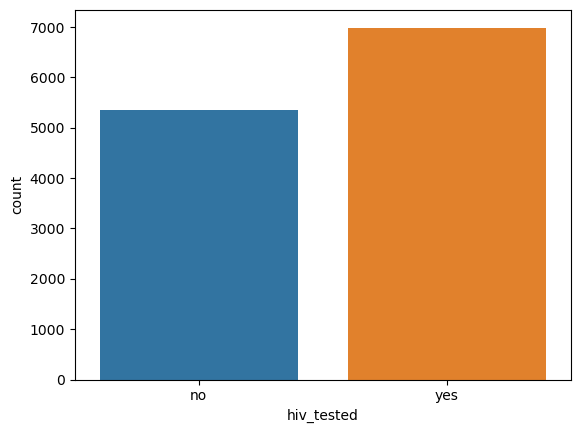

In [18]:
sns.countplot(data = hiv_nadrop, x = 'hiv_tested')

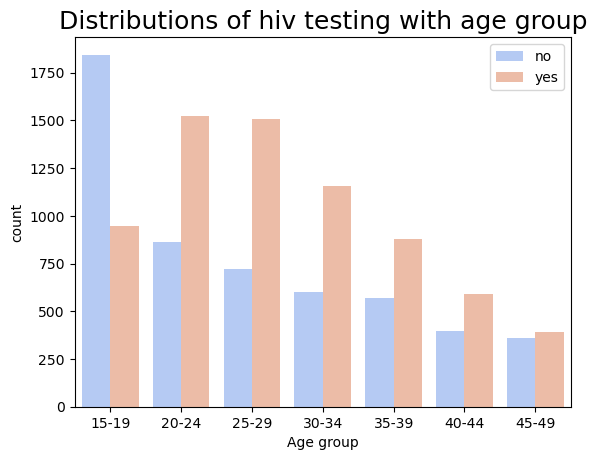

In [19]:
sns.countplot( x = 'v013', hue = 'hiv_tested', data = hiv_nadrop, 
              order = hiv_nadrop['v013'].value_counts().index,
              palette = 'coolwarm')
plt.title('Distributions of hiv testing with age group', fontsize = 18)
plt.xlabel('Age group', fontsize = 10)
plt.xticks(fontsize = 10)
plt.legend()

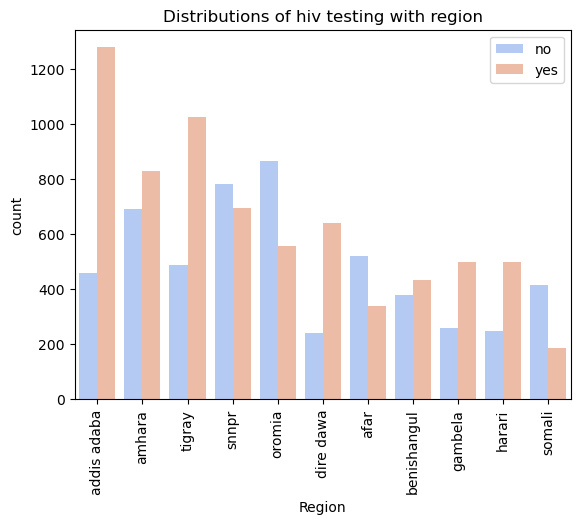

In [20]:
sns.countplot( x = 'v024', hue = 'hiv_tested', data = hiv_nadrop, 
               order = hiv_nadrop['v024'].value_counts().index,
              palette = 'coolwarm')
plt.title('Distributions of hiv testing with region', fontsize = 12)
plt.xlabel('Region', fontsize = 10)
plt.xticks(rotation = 90, fontsize = 10)
plt.legend()

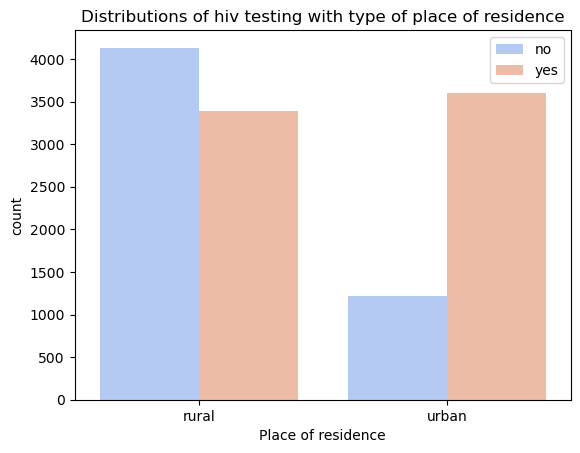

In [21]:
sns.countplot( x = 'v025', hue = 'hiv_tested', data = hiv_nadrop, 
               order = hiv_nadrop['v025'].value_counts().index,
              palette = 'coolwarm')
plt.title('Distributions of hiv testing with type of place of residence', fontsize = 12)
plt.xlabel('Place of residence', fontsize = 10)
plt.xticks(fontsize = 10)
plt.legend()

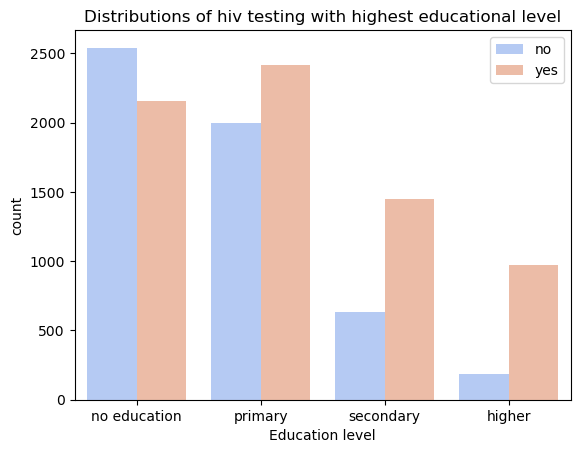

In [22]:
sns.countplot( x = 'v106', hue = 'hiv_tested', data = hiv_nadrop, 
               order = hiv_nadrop['v106'].value_counts().index,
              palette = 'coolwarm')
plt.title('Distributions of hiv testing with highest educational level', fontsize = 12)
plt.xlabel('Education level', fontsize = 10)
plt.xticks(fontsize = 10)
plt.legend()

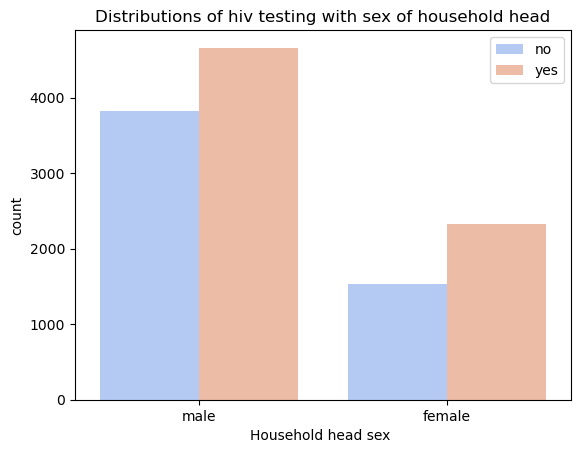

In [23]:
sns.countplot( x = 'v151', hue = 'hiv_tested', data = hiv_nadrop, 
               order = hiv_nadrop['v151'].value_counts().index,
              palette = 'coolwarm')
plt.title('Distributions of hiv testing with sex of household head', fontsize = 12)
plt.xlabel('Household head sex ', fontsize = 10)
plt.xticks(fontsize = 10)
plt.legend()

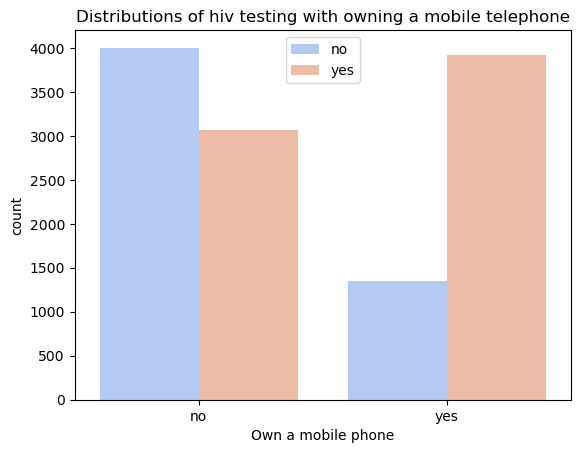

In [24]:
sns.countplot( x = 'v169a', hue = 'hiv_tested', data = hiv_nadrop, 
               order = hiv_nadrop['v169a'].value_counts().index,
              palette = 'coolwarm')
plt.title('Distributions of hiv testing with owning a mobile telephone', fontsize = 12)
plt.xlabel('Own a mobile phone', fontsize = 10)
plt.xticks(fontsize = 10)
plt.legend()

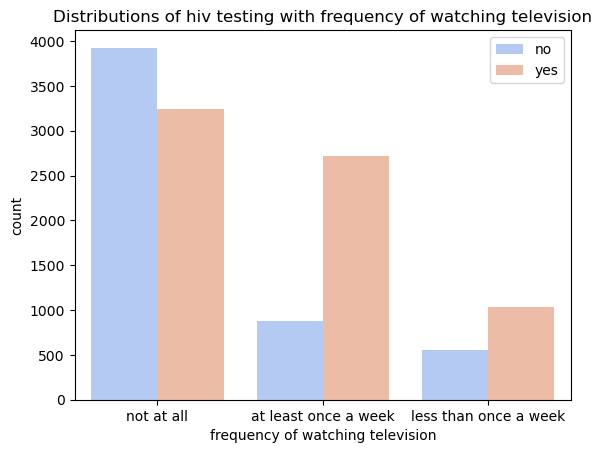

In [25]:
sns.countplot( x = 'v159', hue = 'hiv_tested', data = hiv_nadrop, 
               order = hiv_nadrop['v159'].value_counts().index,
              palette = 'coolwarm')
plt.title('Distributions of hiv testing with frequency of watching television', fontsize = 12)
plt.xlabel('frequency of watching television', fontsize = 10)
plt.xticks(fontsize = 10)
plt.legend()

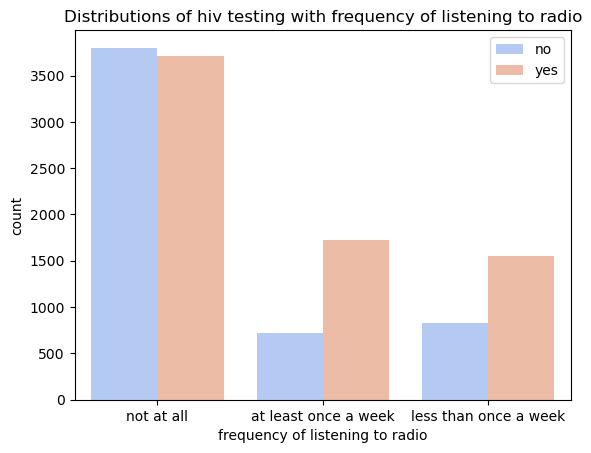

In [26]:
sns.countplot( x = 'v158', hue = 'hiv_tested', data = hiv_nadrop, 
               order = hiv_nadrop['v158'].value_counts().index,
              palette = 'coolwarm')
plt.title('Distributions of hiv testing with frequency of listening to radio', fontsize = 12)
plt.xlabel('frequency of listening to radio', fontsize = 10)
plt.xticks(fontsize = 10)
plt.legend()

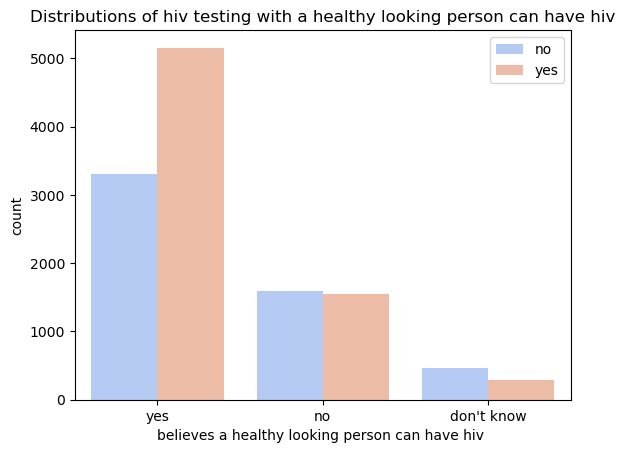

In [27]:
sns.countplot( x = 'v756', hue = 'hiv_tested', data = hiv_nadrop, 
               order = hiv_nadrop['v756'].value_counts().index,
              palette = 'coolwarm')
plt.title('Distributions of hiv testing with a healthy looking person can have hiv', fontsize = 12)
plt.xlabel('believes a healthy looking person can have hiv ', fontsize = 10)
plt.xticks(fontsize = 10)
plt.legend()

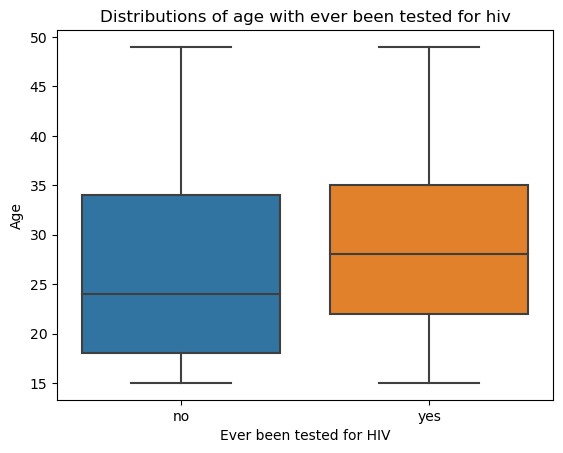

In [28]:
sns.boxplot(x="hiv_tested", y="v012", data=hiv_nadrop)
plt.title('Distributions of age with ever been tested for hiv', fontsize = 12)
plt.xlabel('Ever been tested for HIV', fontsize = 10)
plt.ylabel('Age', fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

In [8]:
hiv_nadrop['hiv_tested'].value_counts()

hiv_tested
yes    6989
no     5355
Name: count, dtype: int64

## check for Outliers 

### Age

Text(0.5, 1.0, 'Box Plot of Age')

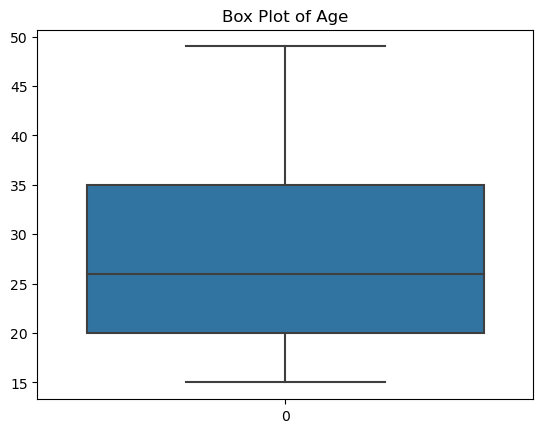

In [29]:
# Box Plot
sns.boxplot(hiv_nadrop['v012'])
plt.title('Box Plot of Age')

From the box plot we can see that age does not have any outliers 

## Detecting correlation (multicollinearity)

In [10]:
#identify all categorical variables
hiv_numeric = hiv_nadrop.copy()

In [365]:
hiv_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12344 entries, 0 to 15681
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   v012        12344 non-null  int8    
 1   v024        12344 non-null  category
 2   v025        12344 non-null  category
 3   v106        12344 non-null  category
 4   v120        12344 non-null  category
 5   v121        12344 non-null  category
 6   v130        12344 non-null  category
 7   v151        12344 non-null  category
 8   v152        12344 non-null  category
 9   v153        12344 non-null  category
 10  v155        12344 non-null  category
 11  v157        12344 non-null  category
 12  v158        12344 non-null  category
 13  v159        12344 non-null  category
 14  v169a       12344 non-null  category
 15  v170        12344 non-null  category
 16  v171a       12344 non-null  category
 17  v171b       12344 non-null  category
 18  v754cp      12344 non-null  category
 19  v754dp   

In [11]:
#identify all categorical variables
cat_columns = hiv_numeric.select_dtypes(['category']).columns

In [32]:
cat_columns

Index(['v013', 'v024', 'v025', 'v106', 'v120', 'v121', 'v130', 'v151', 'v152',
       'v153', 'v155', 'v157', 'v158', 'v159', 'v169a', 'v170', 'v171a',
       'v171b', 'v754cp', 'v754dp', 'v754jp', 'v754wp', 'v756', 'v774a',
       'v774b', 'v774c', 'v777a', 'hiv_tested', 'v783', 'v823', 'v824', 'v825',
       'v858'],
      dtype='object')

In [12]:
#convert all categorical variables to numeric
hiv_numeric[cat_columns] = hiv_numeric[cat_columns].apply(lambda x: pd.factorize(x)[0])

<Axes: >

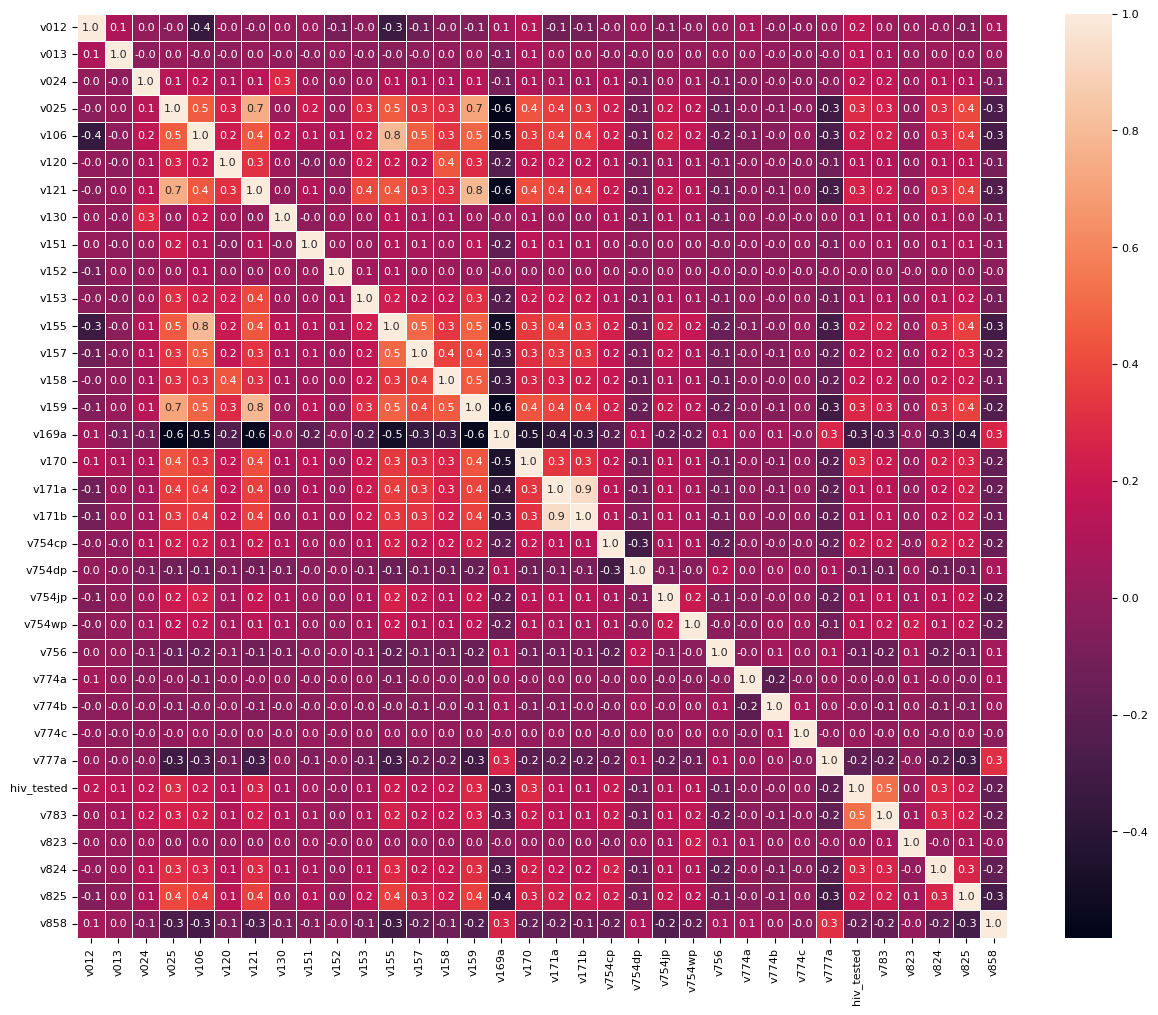

In [13]:
plt.figure(figsize = (15,12))
plt.rcParams.update({'font.size': 8})
sns.heatmap(hiv_numeric.corr(method='spearman'), annot= True, linewidths=.5, fmt= '.1f')

- The varibale v159 (frequency of watching television) and v121 (household has: television) are highly correlated, so we will drop v121 
- The vairbale v155 (literacy) is correlated with v106 (highest educational level), so we will drop v155
- The vairbale v171a (use of internet) is correlated with v171b (frequency of using internet last month), so we will drop v171b
- We will drop v013 (age in 5-year groups)

In [14]:
hiv_final = hiv_numeric.drop(columns=['v013','v121', 'v155', 'v171b'])

In [37]:
hiv_final.shape

(12344, 30)

# Build model

### Split the data to training and testing set

In [15]:
X = hiv_final.drop("hiv_tested", axis=1) 
Y = hiv_final["hiv_tested"] 

In [39]:
X.shape

(12344, 29)

In [40]:
Y.shape

(12344,)

In [16]:
# split data train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Random Forest model

In [20]:
#random forest classifier with n_estimators=10 (default)
model_rfm = RandomForestClassifier(random_state=43)      
model_rf = model_rfm.fit(x_train,y_train)

In [21]:
predicted_Y = model_rf.predict(x_test)

Accuracy is:  0.7829080599432969
classification report:                precision    recall  f1-score   support

           0       0.79      0.69      0.74      1098
           1       0.78      0.85      0.81      1371

    accuracy                           0.78      2469
   macro avg       0.78      0.77      0.78      2469
weighted avg       0.78      0.78      0.78      2469



<Axes: >

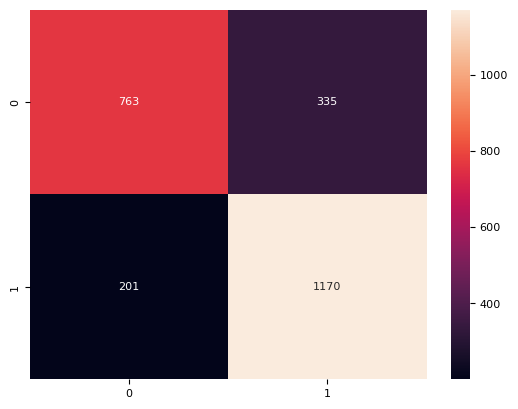

In [22]:
ac = accuracy_score(y_test,predicted_Y)
cl_p = classification_report(y_test, predicted_Y)
print('Accuracy is: ',ac)
print('classification report: ',cl_p)
cm = confusion_matrix(y_test,predicted_Y)
sns.heatmap(cm,annot=True,fmt="d")

# Catboost model

In [48]:
# Initialize the CatBoost model
catboost_model = CatBoostClassifier(verbose=0)

# Train the model
catboost_model.fit(x_train,y_train)

In [49]:
catboost_predicted_Y = catboost_model.predict(x_test)

Accuracy is:  0.7869582827055488
classification report:                precision    recall  f1-score   support

           0       0.80      0.69      0.74      1098
           1       0.78      0.87      0.82      1371

    accuracy                           0.79      2469
   macro avg       0.79      0.78      0.78      2469
weighted avg       0.79      0.79      0.78      2469



<Axes: >

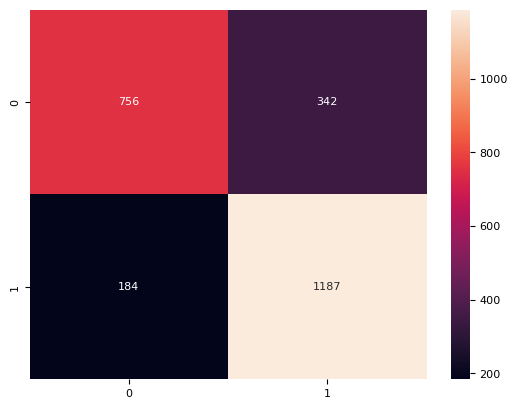

In [50]:
ac = accuracy_score(y_test,catboost_predicted_Y)
cl_p = classification_report(y_test, catboost_predicted_Y)
print('Accuracy is: ',ac)
print('classification report: ',cl_p)
cm = confusion_matrix(y_test, catboost_predicted_Y)
sns.heatmap(cm,annot=True,fmt="d")

# Compare Machine Learning Algorithms

## Cross validation

In [53]:
# Prepare configuration for cross-validation test harness
seed = 123
np.random.seed(seed)

# Prepare models
models =[
    ('LR', LogisticRegression(max_iter=1000)),
    ('RF', RandomForestClassifier()),
    ('CAT', CatBoostClassifier(verbose=0)),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB())
]

In [54]:
# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.754293 (0.010121)
RF: 0.784430 (0.005998)
CAT: 0.786860 (0.010048)
CART: 0.720594 (0.009105)
NB: 0.748783 (0.010329)


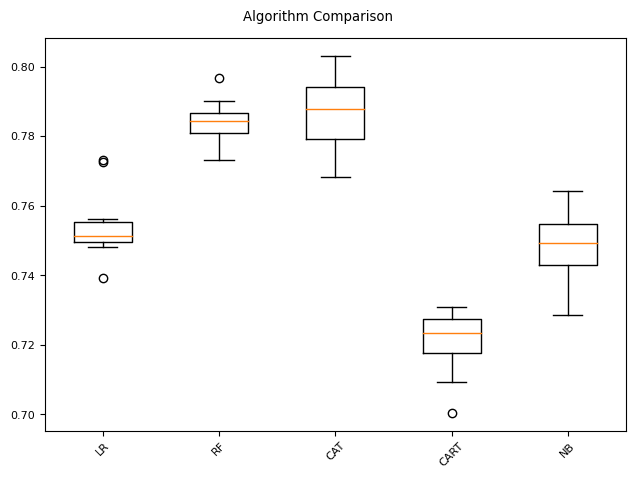

In [55]:
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## lazypredict library

In [323]:
import lazypredict

In [26]:
from lazypredict.Supervised import LazyClassifier

In [27]:
# Defines and builds the lazyclassifier
clf = LazyClassifier( verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit( x_train, x_train, y_train, y_train )
models_test, predictions_test = clf.fit( x_train, x_test, y_train, y_test )

100%|██████████| 29/29 [00:36<00:00,  1.24s/it]


[LightGBM] [Info] Number of positive: 5618, number of negative: 4257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 9875, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568911 -> initscore=0.277411
[LightGBM] [Info] Start training from score 0.277411
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:24<00:00,  1.18it/s]

[LightGBM] [Info] Number of positive: 5618, number of negative: 4257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 9875, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568911 -> initscore=0.277411
[LightGBM] [Info] Start training from score 0.277411


In [28]:
# Prints the model performance on training set
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.09
RandomForestClassifier,1.00,1.00,1.00,1.00,1.44
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.05
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.51
LabelPropagation,1.00,1.00,1.00,1.00,7.09
LabelSpreading,1.00,1.00,1.00,1.00,8.03
BaggingClassifier,0.99,0.99,0.99,0.99,0.42
XGBClassifier,0.93,0.92,0.92,0.93,0.21
LGBMClassifier,0.87,0.85,0.85,0.86,0.13


In [29]:
# Prints the model performance on test dataset
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.79,0.78,0.78,0.79,0.33
RandomForestClassifier,0.78,0.77,0.77,0.78,1.35
LGBMClassifier,0.78,0.77,0.77,0.78,0.10
XGBClassifier,0.78,0.77,0.77,0.78,0.10
SVC,0.78,0.76,0.76,0.77,3.76
NuSVC,0.77,0.76,0.76,0.77,4.77
ExtraTreesClassifier,0.77,0.76,0.76,0.76,1.52
LogisticRegression,0.76,0.75,0.75,0.75,0.04
RidgeClassifierCV,0.76,0.74,0.74,0.75,0.04


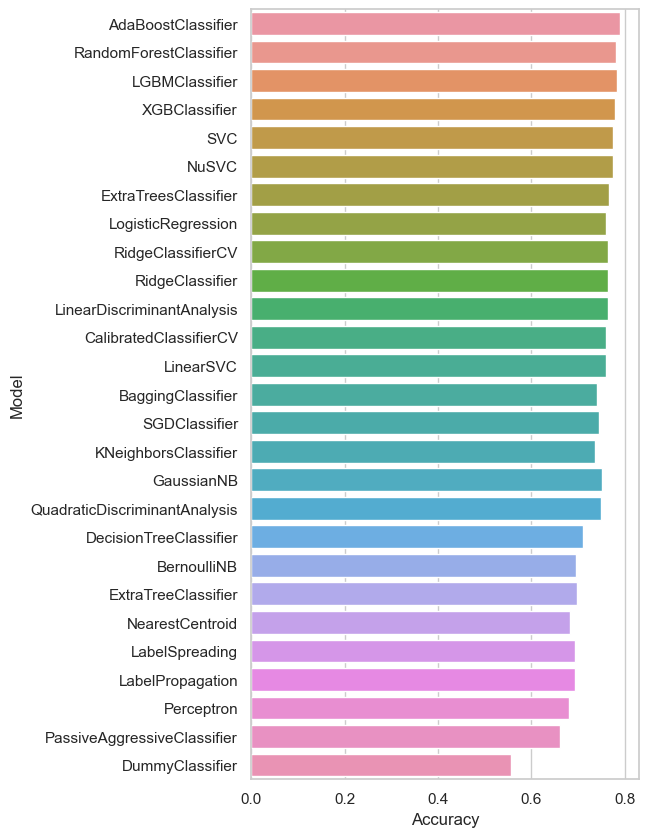

In [30]:
plt.figure(figsize=(5, 10))
sns.set_theme(style= "whitegrid")
ax = sns.barplot(y=models_test.index, x= "Accuracy", data=models_test)

# Feature importance

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features

In [61]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

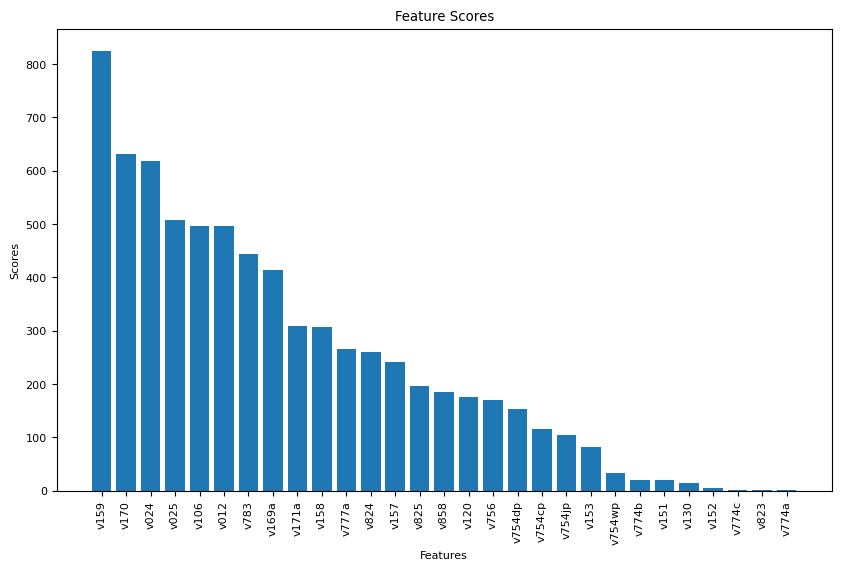

In [62]:
# Get the scores and feature names
scores = select_feature.scores_
feature_names = x_train.columns

# Sort the scores and feature names
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Feature Scores')
plt.show()

<dd>1.'v159' - frequency of watching television <dd>
<dd>2.'v170' - has an account in a bank or other financial institution <dd>
<dd>3.'v024' - region <dd>
<dd>4.'v025' - type of place of residence<dd>
<dd>5.'v106' - highest educational level <dd>
<dd>6.'v012' - respondent's current age <dd>

### Feature Importance from Tree-based Models

Tree-based models like Random Forest or Gradient Boosting have built-in feature importance scores.

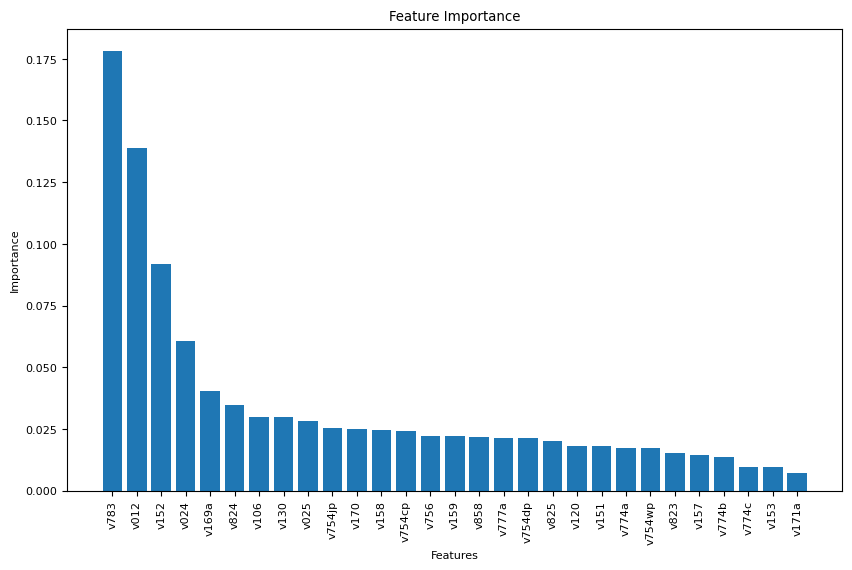

In [24]:
importances = model_rfm.feature_importances_
indices = np.argsort(importances)[::-1]

# Sorted features and importances
sorted_importances = importances[indices]
sorted_features = x_train.columns[indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

<dd>1.'v783'- 'know a place to get hiv test'<dd>
<dd>2.'v012'- - respondent's current age <dd>
<dd>3.'v152': 'age of household head'<dd>
<dd>4.'v024': 'region'<dd>
<dd>5.'v169a': 'owns a mobile telephone'<dd>
    

The cross-validation results demonstrated the robustness of CatBoost and Random Forest, with CatBoost achieving a mean accuracy of 0.7869 (±0.0100) and Random Forest achieving a mean accuracy of 0.7844 (±0.0060). Results from the LazyPredict library also highlighted the effectiveness of AdaBoost, Random Forest, LGBMClassifier, XGBClassifier, and SVC, with AdaBoost leading in accuracy at 0.79.

Feature importance analysis provided valuable insights into the most influential predictors. Using the SelectKBest method, the top features identified were the frequency of watching television, having a bank account, region, type of residence, and highest educational level. Additionally, the feature importance scores from the Random Forest model underscored the significance of knowing a place to get an HIV test, the respondent's current age, the age of the household head, region, and owning a mobile telephone.

Overall, CatBoost and Random Forest models exhibited strong performance, with CatBoost slightly ahead in terms of accuracy and recall. The analyses confirm that these models are robust and reliable for the dataset. Key demographic factors, lifestyle choices, and financial status emerged as critical features in predicting the target variable. Future work should focus on refining these models through hyperparameter tuning and exploring additional feature engineering techniques to further enhance predictive performance.